분류 : 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식

### 결정 트리 (185p)
데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리(Tree)기반의 분류 규칙을 만드는 것

트리의 깊이가 깊어질 수록 과적합으로 이어지기 쉽고, 결정 트리의 예측 성능이 저하될 가능성이 높다.

-> 가능한 얕은 깊이로 균일하게 데이터를 나누는 것이 중요

결정노드는 정보 균일도가 높은 데이터 세트를 먼저 선택할 수 있도록 규칙 조건을 만듦

-> 엔트로피를 이용한 `정보이득지수`와 `지니계수`로 판단

#### 정보이득지수 

(1 - 엔트로피 지수), 정보이득지수가 높은 속성을 기준으로 분할함

#### 지니계수

경제학에서 불평등 지수를 나타낼 때 사용하는 지수, 지니 계수가 낮은 속성을 기준으로 분할함

결정 트리의 일반적인 알고리즘은 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류를 결정함

### 결정 트리 모델의 특징
1. 가장 큰 장점은 `균일도`라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이다.
2. 정보의 균일도만 신경 쓰면 되므로 특별한 경우를 제외하고는 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요없다.
3. 가장 큰 단점은 `과적합`으로 정확도가 떨어진다는 점이다.

-> 트리의 크기를 사전에 제한해 과적합을 방지할 수 있다.

`min_samples_split` -- 노드를 분할하기 위한 최소한의 샘플 데이터 수 : 과적합 제어

-> 샘플을 분할하기 위한 최소한의 수

`min_samples_leaf` -- 리프 노드가 되기 위한 최소한의 샘플 데이터 수 : 과적합 제어

-> 특정 클래스의 데이터가 극도로 작은 비대칭적 데이터의 경우 작게 설정하는 것이 필요함

`max_features` -- 최적의 분할을 위해 고려할 최대 피처 개수

`max_depth` -- 트리의 최대 깊이를 규정

-> default 값은 None, 완벽하게 클래스가 규정될 때까지 깊이를 계속 키우며 분할함

`max_leaf_nodes` -- 리프 노드의 최대 개수

### 리프(leaf) 노드
리프 노드가 되려면 오직 하나의 클래스 값으로 최종 데이터가 구성되거나, 리프 노드가 될 수 있는 하이퍼 파라미터 조건을 충족하면 된다.

이 때의 지니계수는 0이다.

#### `min_samples_split`과 `min_samples_leaf`의 차이

min_samples_split 은 sample의 수에 대해 더 쪼갤 것인가를 결정하는 지표고, min_samples_leaf 는 leaf 노드로 결정할 것인가를 정하는 지표이다.

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

iris = load_iris()

In [2]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=11)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

dtree.score(X_valid, y_valid)

0.8666666666666667

In [3]:
dtree.feature_importances_

array([0.01667014, 0.01667014, 0.0403415 , 0.92631822])

In [4]:
for col, imp in zip(iris.feature_names, dtree.feature_importances_):
    print('{:<17}\'s importances : {:>5.4f}'.format(col, imp))

sepal length (cm)'s importances : 0.0167
sepal width (cm) 's importances : 0.0167
petal length (cm)'s importances : 0.0403
petal width (cm) 's importances : 0.9263


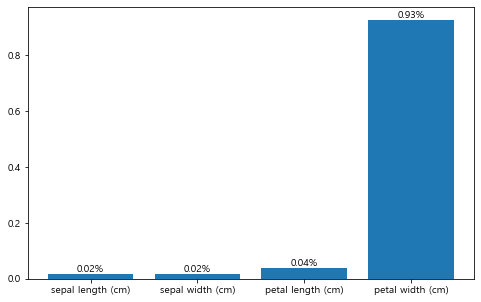

In [5]:
fig, ax = plt.subplots(figsize=(8, 5), facecolor='white')

bars = ax.bar(height=dtree.feature_importances_, x=iris.feature_names)
ax.bar_label(bars, fmt='%.2f%%')

plt.show()

### 결정 트리 과적합 (199p)

make_classification : 분류를 위한 테스트용 데이터를 만드는 함수

반환 객체 : feature, label

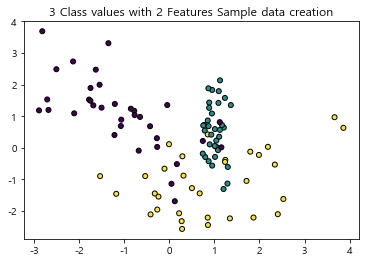

In [6]:
from sklearn.datasets import make_classification

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화 : Feature - 2개 , label - 3종류
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨.
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

In [7]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

<ipython-input-7-1895b4fcd376>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


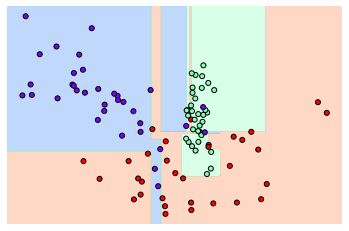

In [8]:
dtree = DecisionTreeClassifier()
dtree.fit(X_features, y_labels)
visualize_boundary(dtree, X_features, y_labels)

기본 파라메터의 경우 엄격한 분할 기준으로 인해 과적합이 일어남

<ipython-input-7-1895b4fcd376>:21: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


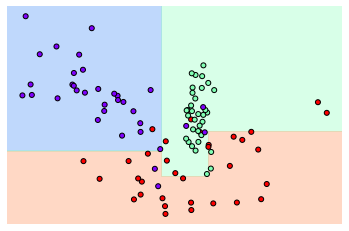

In [9]:
dtree = DecisionTreeClassifier(min_samples_leaf=6)
dtree.fit(X_features, y_labels)
visualize_boundary(dtree, X_features, y_labels)

### 결정 트리 실습 - 사용자 행동 인식 데이터 세트 (201p)

In [10]:
## features.txt에는 피처이름 index와 피처명이 공백으로 분리되어 있음.
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', 
                             header=None, names=['column_index', 'column_name'])

## 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출 :', feature_name[:10])

전체 피처명에서 10개만 추출 : ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [11]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [12]:
feature_name_df.nunique()
## -> 중복된 피처명을 가지고 있음

column_index    561
column_name     477
dtype: int64

In [13]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [14]:
dup_list = feature_dup_df[feature_dup_df['column_index']>1].index

for dup in dup_list:
    temp_list = feature_name_df.loc[feature_name_df['column_name']==dup, 'column_name']
    for num, idx, val in list(zip([1, 2, 3], temp_list.index, temp_list.values)):
        feature_name_df.loc[idx, 'column_name'] = val + f'_{num}'

In [15]:
print(feature_name_df[feature_name_df['column_name'].str.contains('_3')])

     column_index                         column_name
330           331        fBodyAcc-bandsEnergy()-1,8_3
331           332       fBodyAcc-bandsEnergy()-9,16_3
332           333      fBodyAcc-bandsEnergy()-17,24_3
333           334      fBodyAcc-bandsEnergy()-25,32_3
334           335      fBodyAcc-bandsEnergy()-33,40_3
335           336      fBodyAcc-bandsEnergy()-41,48_3
336           337      fBodyAcc-bandsEnergy()-49,56_3
337           338      fBodyAcc-bandsEnergy()-57,64_3
338           339       fBodyAcc-bandsEnergy()-1,16_3
339           340      fBodyAcc-bandsEnergy()-17,32_3
340           341      fBodyAcc-bandsEnergy()-33,48_3
341           342      fBodyAcc-bandsEnergy()-49,64_3
342           343       fBodyAcc-bandsEnergy()-1,24_3
343           344      fBodyAcc-bandsEnergy()-25,48_3
409           410    fBodyAccJerk-bandsEnergy()-1,8_3
410           411   fBodyAccJerk-bandsEnergy()-9,16_3
411           412  fBodyAccJerk-bandsEnergy()-17,24_3
412           413  fBodyAccJ

In [16]:
feature_name = feature_name_df['column_name'].values

# 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
X_train = pd.read_csv('./data/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
X_test = pd.read_csv('./data/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

# 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
y_train = pd.read_csv('./data/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv('./data/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [18]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [19]:
y_train.action.value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dtree = DecisionTreeClassifier(random_state=156)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)

score = accuracy_score(y_test, pred)
print(f'결정 트리 예측 정확도 : {score:.4f}')

# dtree 하이퍼 파라미터 추출
print(f'dtree classifier 기본 하이퍼 파라미터 : {dtree.get_params()}')

결정 트리 예측 정확도 : 0.8548
dtree classifier 기본 하이퍼 파라미터 : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [21]:
dtree.get_params()['criterion']

'gini'

#### max_depth를 바꿔가며 점수 비교

In [22]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20 ,24]
}

dtree = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(dtree, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_:.4f}')
print(f'GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8481
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 10}


In [23]:
## GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.371648,0.019648,0.005201,3.997567e-04,6,{'max_depth': 6},0.815092,0.870156,0.797279,0.857823,0.870068,0.842084,0.030183,7
1,1.701712,0.026454,0.005201,4.001379e-04,8,{'max_depth': 8},0.807614,0.830048,0.840816,0.865986,0.893197,0.847532,0.029564,2
2,1.990321,0.052135,0.005002,1.775218e-06,10,{'max_depth': 10},0.809653,0.817811,0.842857,0.880952,0.889116,0.848078,0.032201,1
3,2.229722,0.102183,0.005001,4.156970e-07,12,{'max_depth': 12},0.794697,0.813052,0.832653,0.874830,0.895918,0.842230,0.037809,6
4,2.506910,0.190694,0.005402,7.999184e-04,16,{'max_depth': 16},0.800136,0.815772,0.836735,0.881633,0.885034,0.843862,0.034274,4
5,2.526024,0.236664,0.004800,4.004249e-04,20,{'max_depth': 20},0.796057,0.815772,0.832653,0.880952,0.895238,0.844134,0.037986,3
6,2.557187,0.230396,0.005399,4.874200e-04,24,{'max_depth': 24},0.786540,0.815772,0.832653,0.880952,0.895238,0.842231,0.040503,5


In [24]:
cv_results_df[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,{'max_depth': 6},0.842084,7
1,{'max_depth': 8},0.847532,2
2,{'max_depth': 10},0.848078,1
3,{'max_depth': 12},0.842230,6
4,{'max_depth': 16},0.843862,4
5,{'max_depth': 20},0.844134,3
6,{'max_depth': 24},0.842231,5


#### max_depth 와 min_samples_split 을 변경해 가며 점수 비교

In [26]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24]
}

grid_cv = GridSearchCV(dtree, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print(f'GridSearchCV 최고 평균 정확도 수치 : {grid_cv.best_score_:.4f}')
print(f'GridSearchCV 최적 하이퍼 파라미터 : {grid_cv.best_params_}')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.5min finished


GridSearchCV 최고 평균 정확도 수치 : 0.8511
GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 8, 'min_samples_split': 24}


#### 테스트 데이터 예측

In [28]:
best_dtree = grid_cv.best_estimator_
pred1 = best_dtree.predict(X_test)

print('결정 트리 예측 정확도 : {0:.4f}%'.format(accuracy_score(y_test, pred1)*100))

결정 트리 예측 정확도 : 87.1395%


<AxesSubplot:>

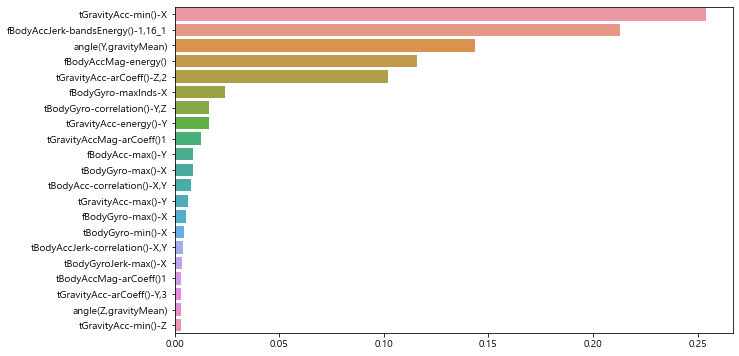

In [41]:
import seaborn as sns

feat_importance_values = best_dtree.feature_importances_
feat_importance_df = pd.Series(feat_importance_values, index=X_train.columns)
feat_top20 = feat_importance_df.sort_values(ascending=False)[0:21]

plt.figure(figsize=(10,6), facecolor='white')
sns.barplot(x=feat_top20, y=feat_top20.index)